In [ ]:
import pandas as pd
from conf import DATA_DIR, ASSETS_DIR
from utils import compute_cohen_on_pandas_columns, compute_contingency_table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
onion_bin_to_compare = pd.read_csv(DATA_DIR + 'onion_bin_to_compare.csv')
emma_bin_to_compare = pd.read_csv(DATA_DIR + 'emma_bin_majority_to_compare.csv')

In [3]:
gems_9 = ['tend', 'joya', 'tran', 'peac', 'nost', 'wond', 'ener', 'sadn', 'tens']

rename_columns = {
    'tend': 'Tenderness',
    'peac': 'Peacefulness',
    'joya': 'Joyful Activation',
    'wond': 'Wonder',
    'ener': 'Power',
    'nost': 'Nostalgia',
    'tens': 'Tension',
    'sadn': 'Sadness',
    'tran': 'Transcendence',
}

Emotion-wise Cohen's Kappa

In [4]:
onion_bin_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
0,wDGNxY33wVBqikW2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Not On Drugs (Ali Payami Remix),Tove Lo,disco
1,a8uQsr6gnzSCNrFB,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Don't Let Me Be Misunderstood,Santa Esmeralda,disco
2,ZdoFOuRY0SRYxxuw,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,You Meant The World To Me,Taylor Dayne,disco
3,yQIJDbt3yfSoXAsU,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Scary But Fun,Grace Jones,disco
4,NFq9a3oLSVaGKJWx,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,I'm So Excited,The Pointer Sisters,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,wb4LtQFBXxV8SaZp,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,I Follow Rivers,Lykke Li,pop
449,tqOQJQT0ziGdhRqD,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Video Games,Lana Del Rey,pop
450,yfm7RER1PWTqgjIp,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Royals,Lorde,pop
451,xKv9A6zDQOEySeNZ,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,Dog Days Are Over,Florence + the Machine,pop


In [5]:
for gems in gems_9:
    kappa = compute_cohen_on_pandas_columns(onion_bin_to_compare, emma_bin_to_compare, gems)
    print(f"{gems}\t{kappa = :.3f}")

wond	kappa = -0.063
tran	kappa = -0.004
tend	kappa = -0.036
nost	kappa = 0.113
peac	kappa = 0.069
joya	kappa = 0.010
ener	kappa = -0.026
sadn	kappa = -0.003
tens	kappa = -0.048


Overall Cohen's Kappa

In [6]:
kappa = compute_cohen_on_pandas_columns(onion_bin_to_compare, emma_bin_to_compare, gems_9)
print(f'Overall: {kappa = :.3f}')

Overall: kappa = 0.055


In [7]:
f_emma = emma_bin_to_compare[gems_9]
f_emma = f_emma.sum() / len(f_emma)
f_emma.name = 'frequency_emma'

In [8]:
f_onion = onion_bin_to_compare[gems_9]
f_onion = f_onion.sum() / len(f_onion)
f_onion.name = 'frequency_user'

In [9]:
f = pd.merge(f_emma, f_onion, left_index=True, right_index=True).sort_values(by='frequency_user', ascending=False)

In [43]:
f = f.rename(index=rename_columns)

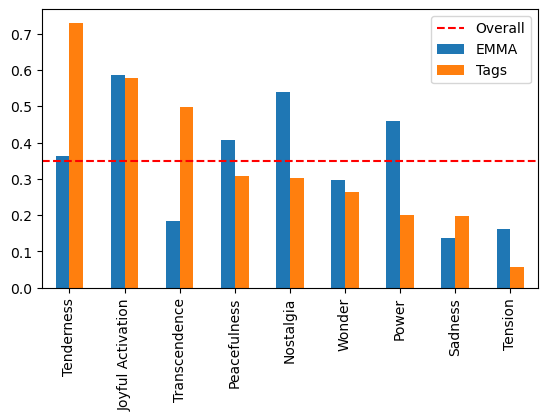

In [48]:
ax = f.plot(y=['frequency_emma', 'frequency_user'], use_index=True, kind='bar', legend=False)
ax.axhline(0.34854059357370615, linestyle='--', color='red', label='overall')
handles, labels = ax.get_legend_handles_labels()
labels = ['Overall', 'EMMA', 'Tags']

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels)
plt.subplots_adjust(bottom=0.30)
ax.figure.savefig(f'{ASSETS_DIR}frequencies.png', dpi=1000)

In [38]:
x_labels[0].set_label('test')

In [39]:
x_labels

[Text(0, 0, 'tend'),
 Text(1, 0, 'joya'),
 Text(2, 0, 'tran'),
 Text(3, 0, 'peac'),
 Text(4, 0, 'nost'),
 Text(5, 0, 'wond'),
 Text(6, 0, 'ener'),
 Text(7, 0, 'sadn'),
 Text(8, 0, 'tens')]

In [11]:
f.corr(method='kendall')

,frequency_emma,frequency_user
frequency_emma,1.000000,0.333333
frequency_user,0.333333,1.000000


In [12]:
from scipy.stats import kendalltau

In [13]:
kendalltau(f.frequency_emma, f.frequency_user)

KendalltauResult(correlation=0.3333333333333333, pvalue=0.25951829805996474)

Chi^2 test as in the following references:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html and https://github.com/scipy/scipy/blob/v1.11.4/scipy/stats/contingency.py#L144-L365
https://westernsydney.pressbooks.pub/customerinsights/chapter/chapter-19-association-between-variables/
https://stats.oarc.ucla.edu/spss/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-spss/

In [14]:
emma_bin_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
0,04q3VppIQEET5rzy,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
1,07xF9Q0K1t3ist7K,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Ponta de lança africano (Umbabarauma),Jorge Ben,nova
2,08QtcDK0rtDFogFP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Heaven,Lamb,downtempo
3,0aXjQyzzLGf1xxdI,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cais,Milton Nascimento,nova
4,0d32mc0rFIgiPh0B,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Please Stay (7th District Radio Mix),Kylie Minogue,europop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,zsDz17XVFUFYh4y7,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A Love That Will Last,Renee Olstead,jazz
449,ZSnDQ7mhvjJLx9IG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canto De Ossanha,Elis Regina,nova
450,zTyH0fZwZ8ytmKuF,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,I Never Loved a Man (the Way I Love You),Aretha Franklin,soul
451,ZVjUg4rlqeq2zk7C,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Gasoline,Alpine,pop


In [15]:
contingency = compute_contingency_table(onion_bin_to_compare, emma_bin_to_compare, gems=gems_9)

In [16]:
contingency / 10

array([[178.1,  87.5],
       [ 87.5,  54.6]])

In [17]:
chi2_contingency(observed=contingency)

(12.000442513801008,
 0.0005318791981673944,
 1,
 array([[1730.27618347,  925.72381653],
        [ 925.72381653,  495.27618347]]))

In [18]:
for gems in gems_9:
    
    contingency = compute_contingency_table(onion_bin_to_compare, emma_bin_to_compare, gems)
    chi2, p_val, _, exp = chi2_contingency(contingency)
    print(f"{gems}\t{chi2 = :.3f}\t{p_val = :.3f}")

wond	chi2 = 1.500	p_val = 0.221
tran	chi2 = 0.000	p_val = 1.000
tend	chi2 = 0.800	p_val = 0.371
nost	chi2 = 6.799	p_val = 0.009
peac	chi2 = 1.948	p_val = 0.163
joya	chi2 = 0.016	p_val = 0.899
ener	chi2 = 0.289	p_val = 0.591
sadn	chi2 = 0.000	p_val = 1.000
tens	chi2 = 0.862	p_val = 0.353


In [19]:
for gems in ['nost']:
    
    contingency = compute_contingency_table(onion_bin_to_compare, emma_bin_to_compare, gems)
    chi2, p_val, _, exp = chi2_contingency(contingency)
    print(f"{gems}\t{chi2 = :.3f}\t{p_val = :.3f}")

nost	chi2 = 6.799	p_val = 0.009


In [20]:
contingency

array([[159, 157],
       [ 50,  87]])